P(A/B) = (P(B/A) * P(A) ) / P(B)

P(class1 / feature 1)

p(class1 / feature 2) and so on


P(class2 / feature 1) 

P(class2 / feature 2) and so on


Comparison:
P(class 1/ feature X) v/s P (class 2 /feature X)

Hence, Naive bayes the problabistic type of classifier. .First we calculate probabilities, based on which we assign class

Step 1: calculate probability of each class on overall dataset, class 1 and class 2 here

Step 2: Draw circle around the new record introduced and which needs to be classified. Input parameter - small/big is your choice

Step 3: The other records that are present in the that circle with the new record are considered to have almost similar range of features as new record.

Step 4: Count the number of other records in the circle

Step 5: We calculate P(X), which is the probability of the new point added being similar in feature to fall in that circle. = number of similar observation in the circle / total observations

Step 6: Now calculate P(X/class1) = Total number of observation class 1 in that circle / total number of observations of class 1 

Step 7: So we get P(class 1 / X) = (P(X/class1) * P(class 1)) / P(X)

Note: Do the same thing for other classes

Now we will compare these probabilities of different classes

And we decide which is more likely class for that new record introduced


Qestion: Why is called Naive?
Answer: Bayes theorem requires some independence assumption. These assumptions are sometimes not correct and hence it is naive to assume that they are.

Bayes theorem requires are that all should be independent. this is the fundamental assumption in Bayes theorem. in other words, there shouldn't be any corelation between 2 variables


Note 2: We can get rid of the P(B)(P(X)) in the main formula above, since it will remain constant while calculating probabilities of each class given new record. and we just want to compare these values and not calculate the exact value.

In [3]:
import pandas as pd
Naive_bayes_data = pd.read_csv('Naive_bayes_data.csv')
Naive_bayes_data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [4]:
X = Naive_bayes_data.iloc[:,[2,3]].values
Y = Naive_bayes_data.iloc[:,4].values

In [5]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 121)

In [6]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\00821554\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\00821554\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\00821554\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
#fitting the classifier to the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [9]:
#predicting the test set results
y_pred = classifier.predict(X_test)

In [10]:
#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[50,  3],
       [ 6, 21]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


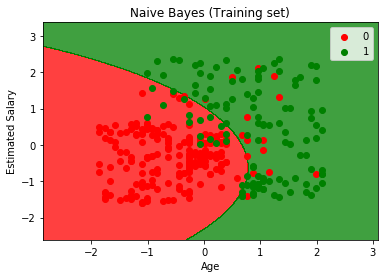

In [12]:
import numpy as np
import matplotlib.pyplot as plt

#Visualizing the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
#meshgrid creates pixel points, with start and stop range given and at step size of 0.01, which makes it seem continuous


plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
#contourf creates seperate sections for 2 classes

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
#The above loop creates red and green data points in their respective class in the graph

plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


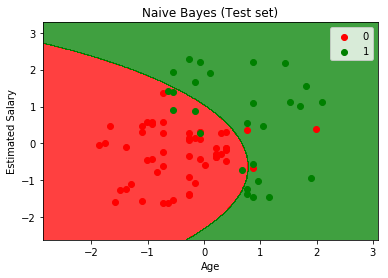

In [13]:
#Visualizing the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
#meshgrid creates pixel points, with start and stop range given and at step size of 0.01, which makes it seem continuous


plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
#contourf creates seperate sections for 2 classes

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()